In [64]:
import numpy as np
import pandas as pd

In [65]:
def display_eval(df, target_protein = None):
    if target_protein is not None:
        df = df[df['protein_name'] == target_protein + '.pdb']
    rewards_eval = df['rewards_eval'].values
    scRMSD_eval = df['gen_true_bb_rmsd'].values

    pred_ddg_med = np.median(rewards_eval)
    pos_ddg_prop = np.mean(rewards_eval > 0)
    scRMSD_med = np.median(scRMSD_eval)
    low_rmsd_prop = np.mean(scRMSD_eval < 2)
    success_rate = np.mean((rewards_eval > 0) & (scRMSD_eval < 2))

    print(f"Pred-ddG (median)↑: {pred_ddg_med:.3f}")
    print(f"%(ddG > 0) (%)↑: {pos_ddg_prop * 100:.1f}")
    print(f"scRMSD (median)↓: {scRMSD_med:.3f}")
    print(f"%(scRMSD < 2)(%)↑: {low_rmsd_prop * 100:.1f}")
    print(f"Success Rate (%)↑: {success_rate * 100:.1f}")

    stats = {
        "pred_ddg_med" : pred_ddg_med,
        "pos_ddg_prop" : pos_ddg_prop,
        "scRMSD_med" : scRMSD_med,
        "low_rmsd_prop" : low_rmsd_prop,
        "success_rate" : success_rate
    }
    return stats

pretrained_file = 'data/original_old_10_0.5_0_results_merge.csv' 
drakes_file = 'data/original_new_10_0.5_0_results_merge.csv' 
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)

print("---Pretrained---")
pre_stats = display_eval(df_pre)
print()
print("-----DRAKES-----")
drakes_stats = display_eval(df_drakes)

---Pretrained---
Pred-ddG (median)↑: -0.507
%(ddG > 0) (%)↑: 36.7
scRMSD (median)↓: 0.834
%(scRMSD < 2)(%)↑: 90.0
Success Rate (%)↑: 34.4

-----DRAKES-----
Pred-ddG (median)↑: 1.084
%(ddG > 0) (%)↑: 86.6
scRMSD (median)↓: 0.913
%(scRMSD < 2)(%)↑: 92.4
Success Rate (%)↑: 79.4


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
def analyze_protein_gen_helper(protein_name, dfs, dfs_labels, clrs):
    energy_points = None
    group_labels = []
    for df, label in zip(dfs, dfs_labels):
      pred_ddg = df[df['protein_name'] == protein_name + '.pdb']['rewards_eval'].values
      group_labels.extend([label] * pred_ddg.shape[0])
      energy_points = pred_ddg if (energy_points is None) else np.concatenate((energy_points, pred_ddg))

    data = pd.DataFrame({
    'Energy': np.array(energy_points),
    'Group': group_labels
    })

    plt.figure(figsize=(8, 6))
    for label, clr in zip(dfs_labels, clrs):
      sns.kdeplot(data=data[data['Group'] == label], x='Energy', color=clr, label=label, fill=True, alpha=0.4, bw_adjust=0.8)

    plt.axvline(x=0, color='#E06455', linestyle='--', label='Wild-type')

    plt.title(protein_name, fontsize=18)
    plt.xlabel('Predicted ΔΔG', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='', loc='upper left', fontsize=10)
    
    plt.show()

def analyze_protein_gen(protein_name):
   analyze_protein_gen_helper(protein_name, [df_pre, df_drakes], ['Pretrained', 'DRAKES'], ['#E6D983', '#0C8CE1'])

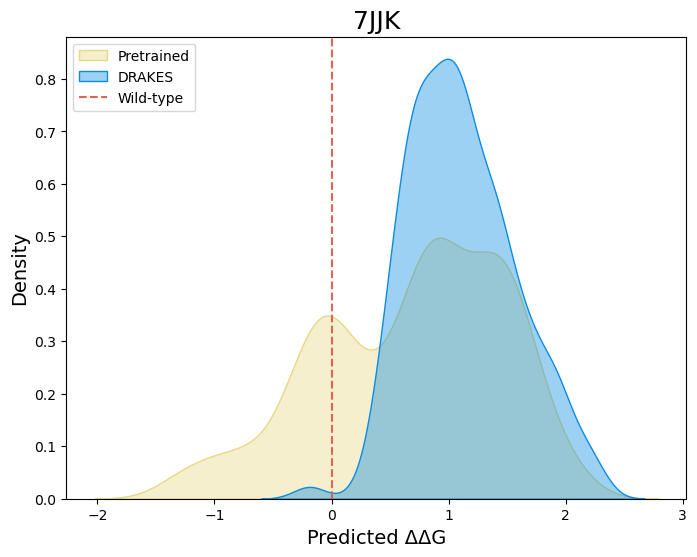

In [68]:
analyze_protein_gen('7JJK')

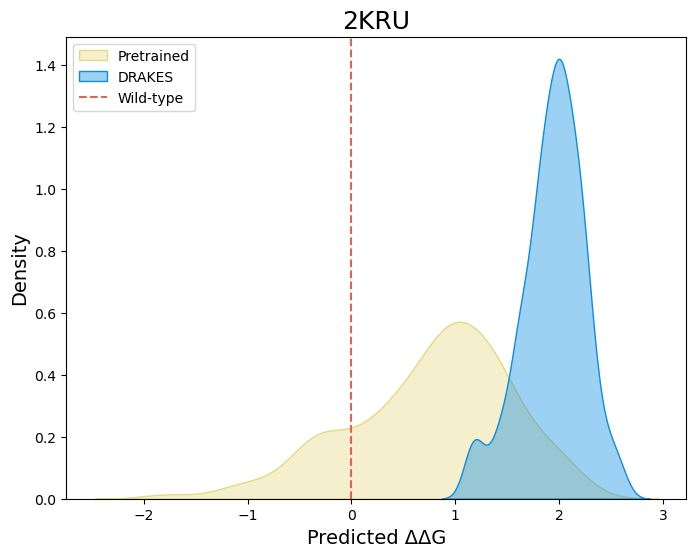

In [69]:
analyze_protein_gen('2KRU')

In [70]:
diff_file_bon_100 = 'data/diffusion_analysis_new_7JJK_bon_100.csv' 
diff_file_bon_50 = 'data/diffusion_analysis_new_7JJK_bon_50.csv' 
diff_file_bon_25 = 'data/diffusion_analysis_new_7JJK_bon_25.csv' 
diff_file_bon_10 = 'data/diffusion_analysis_new_7JJK_bon_10.csv' 
diff_file_bon_5 = 'data/diffusion_analysis_new_7JJK_bon_5.csv' 
diff_file = 'data/diffusion_analysis_new_7JJK_bon_1.csv' 
df_diff = pd.read_csv(diff_file)
df_bon_100 = pd.read_csv(diff_file_bon_100)
df_bon_50 = pd.read_csv(diff_file_bon_50)
df_bon_25 = pd.read_csv(diff_file_bon_25)
df_bon_10 = pd.read_csv(diff_file_bon_10)
df_bon_5 = pd.read_csv(diff_file_bon_5)
diff_iteration = df_diff['Iteration']
mask_proportion = df_diff['Mask Proportion']
mask_proportion_bon_100 = df_bon_100['Mask Proportion']
mask_proportion_bon_50 = df_bon_50['Mask Proportion']
mask_proportion_bon_25 = df_bon_25['Mask Proportion']
mask_proportion_bon_10 = df_bon_10['Mask Proportion']
mask_proportion_bon_5 = df_bon_5['Mask Proportion']
reward_average = df_diff['Reward Average']
reward_average_bon_100 = df_bon_100['Reward Average']
reward_average_bon_50 = df_bon_50['Reward Average']
reward_average_bon_25 = df_bon_25['Reward Average']
reward_average_bon_10 = df_bon_10['Reward Average']
reward_average_bon_5 = df_bon_5['Reward Average']

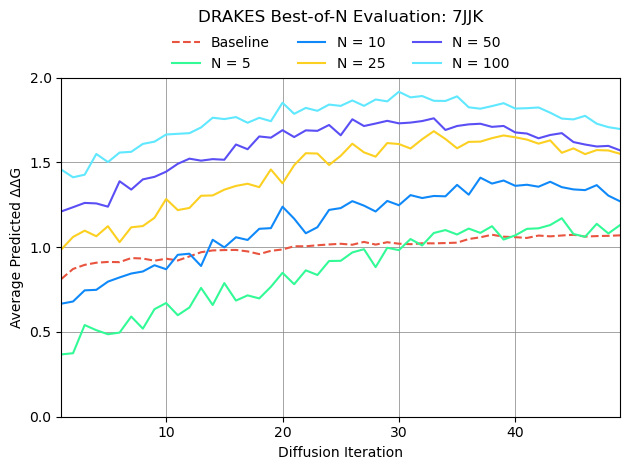

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor, ceil

plt.style.use('default')

fig, ax = plt.subplots()

ax.grid(color='gray', linewidth=0.5)
ax.plot(diff_iteration, reward_average, color='#E8543F', label='Baseline', linestyle='--')
ax.plot(diff_iteration, reward_average_bon_5, color='#32FA96', label='N = 5')
ax.plot(diff_iteration, reward_average_bon_10, color='#0F89F9', label='N = 10')
ax.plot(diff_iteration, reward_average_bon_25, color='#FCD021', label='N = 25')
ax.plot(diff_iteration, reward_average_bon_50, color='#5A4EF5', label='N = 50')
ax.plot(diff_iteration, reward_average_bon_100, color='#5FE8FF', label='N = 100')
ax.set_ylabel('Average Predicted ΔΔG')
ax.set_xlabel('Diffusion Iteration')
ax.tick_params(axis='y', labelcolor='black')
all_reward = np.concatenate((reward_average, reward_average_bon_5, reward_average_bon_10, reward_average_bon_25))
ax.set_ylim(min(all_reward), max(all_reward))
ax.set_xlim(min(diff_iteration), max(diff_iteration))
y_min = floor(min(all_reward))
y_max = ceil(max(all_reward))
ax.set_yticks(np.linspace(y_min, y_max, num=5))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=3, frameon=False)
plt.title('DRAKES Best-of-N Evaluation: 7JJK', pad=40)
plt.tight_layout()
plt.show()

In [74]:
print("---Pretrained---")
pretrain_stats_7jjk = display_eval(df_pre, '7JJK')

print("\n---DRAKES---")
drakes_stats_7jjk = display_eval(df_drakes, '7JJK')

print("\n---BON 10---")
bon_10_file = 'data/original_new_10_0.5_0_results_merge_bon_10.csv' 
df_bon_10 = pd.read_csv(bon_10_file)
bon_10_stats_7jjk = display_eval(df_bon_10, '7JJK')

print("\n---BON 100---")
bon_100_file = 'data/original_new_10_0.5_0_results_merge_bon_100.csv' 
df_bon_100 = pd.read_csv(bon_100_file)
bon_100_stats_7jjk = display_eval(df_bon_100, '7JJK')

---Pretrained---
Pred-ddG (median)↑: 0.806
%(ddG > 0) (%)↑: 76.6
scRMSD (median)↓: 0.874
%(scRMSD < 2)(%)↑: 92.2
Success Rate (%)↑: 71.1

---DRAKES---
Pred-ddG (median)↑: 1.078
%(ddG > 0) (%)↑: 99.2
scRMSD (median)↓: 0.927
%(scRMSD < 2)(%)↑: 99.2
Success Rate (%)↑: 98.4

---BON 10---
Pred-ddG (median)↑: 1.231
%(ddG > 0) (%)↑: 100.0
scRMSD (median)↓: 1.075
%(scRMSD < 2)(%)↑: 89.8
Success Rate (%)↑: 89.8

---BON 100---
Pred-ddG (median)↑: 1.812
%(ddG > 0) (%)↑: 100.0
scRMSD (median)↓: 0.932
%(scRMSD < 2)(%)↑: 95.3
Success Rate (%)↑: 95.3


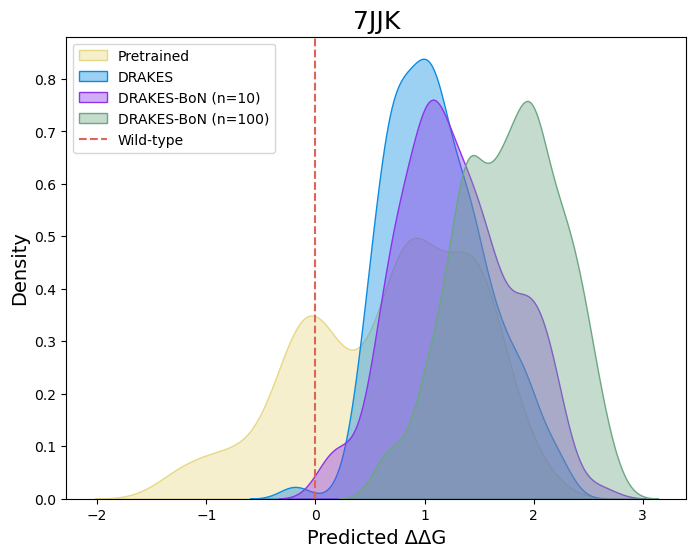

In [75]:
analyze_protein_gen_helper('7JJK', [df_pre, df_drakes, df_bon_10, df_bon_100], ['Pretrained', 'DRAKES', 'DRAKES-BoN (n=10)', 'DRAKES-BoN (n=100)'], ['#E6D983', '#0C8CE1', '#8C33EB', '#6CA783'])

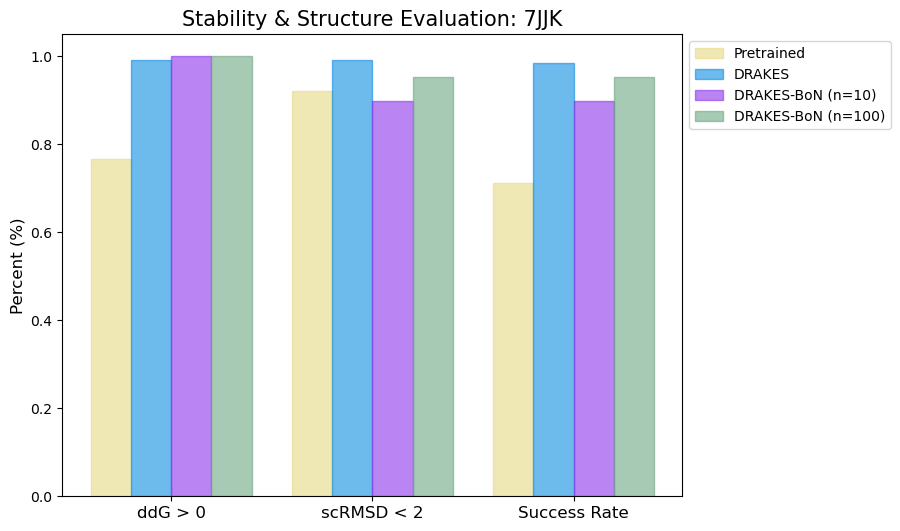

In [131]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Pretrained', 'DRAKES', 'DRAKES-BoN (n=10)', 'DRAKES-BoN (n=100)']
colors = ['#E6D983', '#0C8CE1', '#8C33EB', '#6CA783']
stats = [pretrain_stats_7jjk, drakes_stats_7jjk, bon_10_stats_7jjk, bon_100_stats_7jjk]
pos_ddg_prop = [stat["pos_ddg_prop"] for stat in stats]
low_rmsd_prop = [stat["low_rmsd_prop"] for stat in stats]
success_prop = [stat["success_rate"] for stat in stats]
categories = ["ddG > 0", "scRMSD < 2", "Success Rate"]

x = np.arange(len(categories))
width = 0.2 

fig, ax = plt.subplots(figsize=(8, 6))
for i, (algorithm, color) in enumerate(zip(algorithms, colors)):
    ax.bar(x + (i - 1.5) * width, [pos_ddg_prop[i], low_rmsd_prop[i], success_prop[i]], width, label=algorithm, color=color, edgecolor=color, alpha=0.6)

ax.set_ylabel('Percent (%)', fontsize=12)
ax.set_ylim(bottom=0)
ax.set_title('Stability & Structure Evaluation: 7JJK', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
